In [1]:
%matplotlib inline
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from graph import autolabel           

In [2]:
#make data home value
HV_file="County_MedianValuePerSqft_AllHo.csv"
home_val_data = pd.read_csv(HV_file)
home_val_year=home_val_data[home_val_data["Year"]==2014].values
home_val_df=pd.DataFrame(home_val_year,columns=["year","county","value"])
home_val_df=home_val_df.sort_values("value",ascending = False)

home_val_df  #["county"]=home_val_df["county"].astype(str)
#home_val_df.dtypes

,year,county,value
0,2014,Hennepin,171
2,2014,Ramsey,139
1,2014,Itasca,103
3,2014,Stearns,88
4,2014,Steele,81


In [3]:
#Make data population
pop_df=pd.DataFrame([["Hennepin",2010,100000],
                     ["Ramsey",2010,90000],
                     ["Itasca",2010,70000],
                     ["Stearns",2010,80000],
                     ["Steele",2010,50000]],columns=["county","year","population"])
pop_df


,county,year,population
0,Hennepin,2010,100000
1,Ramsey,2010,90000
2,Itasca,2010,70000
3,Stearns,2010,80000
4,Steele,2010,50000


In [4]:
merge_df=pd.merge(home_val_df,pop_df,how='outer',on="county")

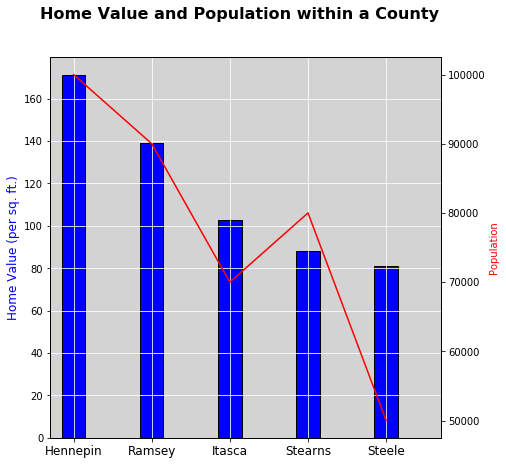

In [5]:

width=.3
fig,ax1=plt.subplots(figsize=(7,7))
ax2=ax1.twinx()

fig.suptitle("Home Value and Population within a County",fontsize=16,fontweight='bold')


merge_df["value"].plot(kind='bar', width = width,color='blue',ax=ax1,edgecolor='black')
#plt.ylabel("Home Value (per sq. ft.)")
merge_df["population"].plot(kind='line',secondary_y=True,color='red')

                         #set shared values
x_axis=np.arange(0,len(home_val_df["county"]))
ax1.set_xticks(x_axis)
ax1.set_xticklabels(merge_df["county"],fontsize=12,rotation=0)
ax1.set_xlim(-.5, len(home_val_df["county"])-0.5)

ax1.set_facecolor('lightgrey')              #background
ax1.grid(color='white')

plt.ylabel("Population",color='red')                 #set y axis values
ax1.set_ylabel("Home Value (per sq. ft.)",color='blue',fontsize=12)
# ax2.set_ylabel("Population",color='red',fontsize=12)
#ax1.yaxis.tick_left()
#ax2.yaxis.tick_right()


#ax1 = plt.gca()
plt.xlim([-width, len(merge_df["value"])-width])


plt.show()

# Save the Figure
#fig.savefig("HV-population.png")
# Show the Figure 
#fig.show()